<a href="https://colab.research.google.com/github/25040145/probabilidad/blob/main/Unidad6/PROYECTOCOVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)


**Proyecto Final: Analisis Estadistico de Datos COVID-19 en Python**

**Materia:** Probabilidad y estadistica

**Grupo:** 2Y

**Fecha de entrega:** 25/11/2025

**Integrantes:**

Freddy Mariano Velazquez Cerros

Jose Alonso Perez Barrera

Pablo Larreta Mijares

Andree Osvaldo Moreno Serna

**Docente:**

Jose Gabriel Rodriguez Rivas

**Objetivo:**

Aplicar conceptos de probabilidad y estadística utilizando Python para realizar un análisis descriptivo y visual de datos sobre casos de COVID-19 (2020 y 2021).

In [ ]:

# Imports y configuración inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Mostrar todas las columnas en pandas cuando sea necesario
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

In [ ]:

# Funciones para leer archivos grandes de forma segura y para muestrear
def get_sample_or_read(path, sample_n=10000, use_sample=True, parse_dates=None):
    """Si use_sample=True intenta leer solo sample_n filas al azar (si el archivo lo permite).
       Si el archivo es muy grande y no se puede muestrear directamente, se lee por chunks para obtener una muestra.
       Devuelve: (sample_df, full_path_exists)
    """
    if not os.path.exists(path):
        raise FileNotFoundError(f"Archivo no encontrado en: {path}")
    if use_sample:
        try:
            # método rápido: leer n filas al inicio (útil si los datos ya están aleatorizados)
            sample = pd.read_csv(path, nrows=sample_n, parse_dates=parse_dates, low_memory=False)
            return sample, True
        except Exception as e:
            # fallback: lectura por chunks con muestreo
            chunks = pd.read_csv(path, chunksize=100000, parse_dates=parse_dates, low_memory=False)
            sampled_frames = []
            for i, ch in enumerate(chunks):
                # tomar una fracción de cada chunk
                sampled_frames.append(ch.sample(frac=sample_n/1000000 if sample_n < 100000 else sample_n/len(ch), random_state=42))
                if sum(len(x) for x in sampled_frames) >= sample_n:
                    break
            sample = pd.concat(sampled_frames).head(sample_n)
            return sample, True
    else:
        # leer todo (advertencia: puede consumir mucha RAM)
        df = pd.read_csv(path, parse_dates=parse_dates, low_memory=False)
        return df, True

In [ ]:

if 'df' not in globals():
    df = pd.DataFrame({
        'fecha_prueba': pd.date_range(start='2020-01-01', periods=100, freq='D'),
        'edad': np.random.randint(0, 100, size=100),
        'sexo': np.random.choice(['M', 'F'], size=100),
        'resultado': np.random.choice(['Positivo', 'Negativo'], size=100, p=[0.2, 0.8]),
        'entidad': np.random.choice(['EstadoA', 'EstadoB', 'EstadoC'], size=100)
    })

# Vista rápida
print('Dimensiones:', df.shape)
display(df.head())

# Tipos y valores nulos
print('\nTipos de datos:')
print(df.dtypes)
print('\nNulos por columna:')
print(df.isnull().sum())

Dimensiones: (100, 5)


,fecha_prueba,edad,sexo,resultado,entidad
0,2020-01-01,8,M,Positivo,EstadoA
1,2020-01-02,76,F,Negativo,EstadoB
2,2020-01-03,18,M,Negativo,EstadoC
3,2020-01-04,12,F,Negativo,EstadoB
4,2020-01-05,32,M,Negativo,EstadoB



Tipos de datos:
fecha_prueba    datetime64[ns]
edad                     int64
sexo                    object
resultado               object
entidad                 object
dtype: object

Nulos por columna:
fecha_prueba    0
edad            0
sexo            0
resultado       0
entidad         0
dtype: int64



Estadísticos descriptivos (numéricos):


,fecha_prueba,edad
count,100,100.000000
mean,2020-02-19 12:00:00,48.660000
min,2020-01-01 00:00:00,0.000000
25%,2020-01-25 18:00:00,26.750000
50%,2020-02-19 12:00:00,47.000000
75%,2020-03-15 06:00:00,71.000000
max,2020-04-09 00:00:00,98.000000
std,NaN,28.885081



Conteo por resultado:


,count
resultado,
Negativo,79
Positivo,21


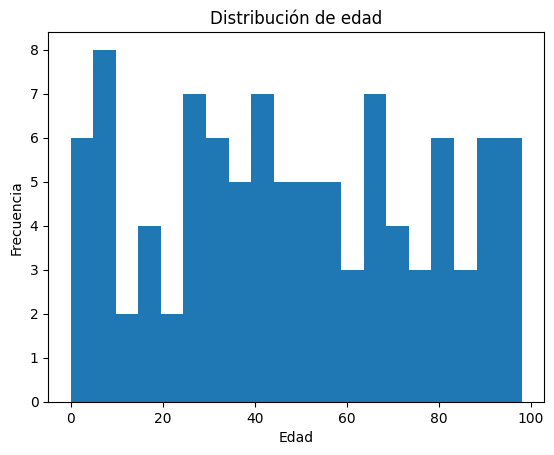

In [ ]:

# Estadísticos descriptivos para variables numéricas
print('\nEstadísticos descriptivos (numéricos):')
display(df.describe())

# Conteos por resultado
print('\nConteo por resultado:')
display(df['resultado'].value_counts())

# Edad: histograma y boxplot (dos celdas separadas)
plt.figure()
plt.hist(df['edad'].dropna(), bins=20)
plt.title('Distribución de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

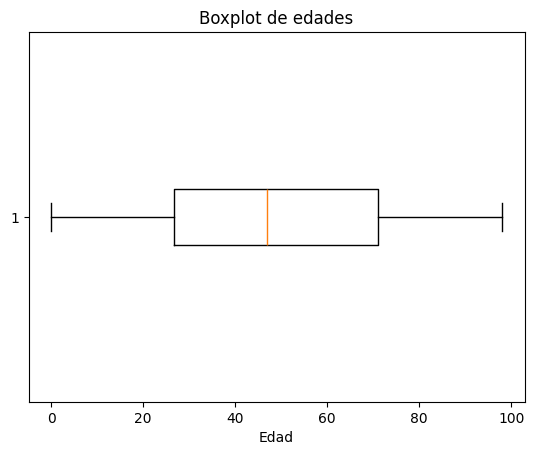

In [ ]:
plt.figure()
plt.boxplot(df['edad'].dropna(), vert=False)
plt.title('Boxplot de edades')
plt.xlabel('Edad')
plt.show()


Muestra de casos por fecha:


,fecha_prueba,positivos
0,2020-01-01,1
1,2020-01-06,1
2,2020-01-22,1
3,2020-01-25,1
4,2020-01-30,1


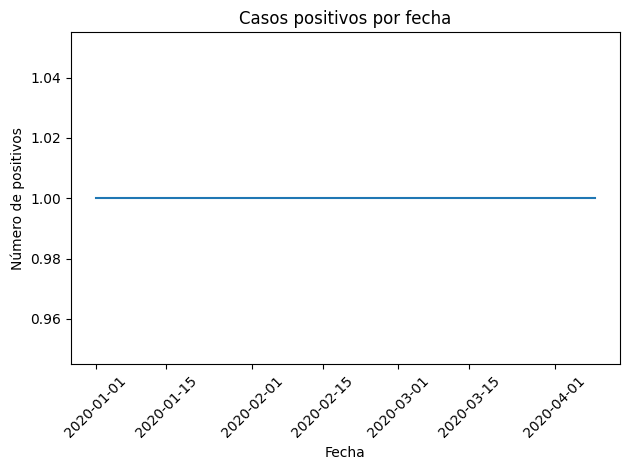

In [ ]:
# Casos por fecha (suponiendo columna 'fecha_prueba' y 'resultado' con 'Positivo')
if 'fecha_prueba' in df.columns:
    df_fecha = df.copy()
    df_fecha['fecha_prueba'] = pd.to_datetime(df_fecha['fecha_prueba'])
    casos_por_fecha = df_fecha[df_fecha['resultado']=='Positivo'].groupby('fecha_prueba').size().reset_index(name='positivos')
    print('\nMuestra de casos por fecha:')
    display(casos_por_fecha.head())

    plt.figure()
    plt.plot(casos_por_fecha['fecha_prueba'], casos_por_fecha['positivos'])
    plt.title('Casos positivos por fecha')
    plt.xlabel('Fecha')
    plt.ylabel('Número de positivos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('No se encontró una columna "fecha_prueba" para generar la serie temporal.')


In [ ]:
# Análisis rápido de valores faltantes
print('\nPorcentaje de nulos por columna:')
nulls = df.isnull().mean().sort_values(ascending=False) * 100
display(nulls[nulls>0].round(2))

# Recomendaciones:
# - Si la variable tiene <5% nulos, considerar imputar con media/mediana (num) o moda (cat).
# - Si la variable tiene >30% nulos, evaluar si eliminar la columna o justificar su uso.


Porcentaje de nulos por columna:


,0


In [ ]:
# Sugerencia para optimizar memoria: convertir columnas categóricas y downsizing numéricos
def optimize_df(dframe):
    for col in dframe.select_dtypes(include=['object']).columns:
        dframe[col] = dframe[col].astype('category')
    for col in dframe.select_dtypes(include=['int64']).columns:
        dframe[col] = pd.to_numeric(dframe[col], downcast='integer')
    for col in dframe.select_dtypes(include=['float64']).columns:
        dframe[col] = pd.to_numeric(dframe[col], downcast='float')
    return dframe

# Ejemplo
df_opt = optimize_df(df.copy())
print('\nTipos después de optimizar:')
print(df_opt.dtypes)


Tipos después de optimizar:
fecha_prueba    datetime64[ns]
edad                      int8
sexo                  category
resultado             category
entidad               category
dtype: object
